## Ajuste do Dataset

### Importação das bibliotecas utilizadas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from matplotlib.ticker import FuncFormatter

### Funções utilizadas:

In [2]:
def df_visualize_atributes(df):

    print(f"O dataframe possui {df.shape[0]} amostras e {df.shape[1]} atributos/colunas.")

    print(f"\nMais informações:\n")

    print(df.info())

### 1 - Importando datasets:

In [ ]:
appearances_data = pd.read_csv('datasets_iniciais/appearances.csv')
game_lineups_data = pd.read_csv('datasets_iniciais/game_lineups.csv')
games_data = pd.read_csv('datasets_iniciais/games.csv')
player_valuations_data = pd.read_csv('datasets_iniciais/player_valuations.csv')
players_data = pd.read_csv('datasets_iniciais/players.csv')
transfers_data = pd.read_csv('datasets_iniciais/transfers.csv')

### 2 - Ajustando dados e tratando valores nulos/duplicados nos datasets:

#### 2.1 - Appearances

##### Visualizando dataframe:

In [4]:
appearances_data.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [5]:
df_visualize_atributes(appearances_data)

O dataframe possui 1706806 amostras e 13 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB
None


##### Ajustando dados:

In [6]:
appearances_data['appearance_id'] = appearances_data['appearance_id'].str.replace("_", "").astype("int64")

In [7]:
appearances_data['date'] = pd.to_datetime(appearances_data['date'])

In [8]:
df_visualize_atributes(appearances_data)

O dataframe possui 1706806 amostras e 13 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   appearance_id           int64         
 1   game_id                 int64         
 2   player_id               int64         
 3   player_club_id          int64         
 4   player_current_club_id  int64         
 5   date                    datetime64[ns]
 6   player_name             object        
 7   competition_id          object        
 8   yellow_cards            int64         
 9   red_cards               int64         
 10  goals                   int64         
 11  assists                 int64         
 12  minutes_played          int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 169.3+ MB
None


##### Verificando dados nulos:

In [9]:
appearances_data.isnull().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

In [10]:
appearances_data[appearances_data['player_name'].isnull()]

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
799042,3084062380365,3084062,380365,16486,-1,2018-09-05,NaN,CDR,1,0,0,0,90
799117,3084059411294,3084059,411294,3302,-1,2018-09-11,NaN,CDR,0,0,0,0,90
799150,3084057255495,3084057,255495,11596,-1,2018-09-12,NaN,CDR,0,0,0,0,90
799165,3102749380365,3102749,380365,16486,-1,2018-09-12,NaN,CDR,0,0,0,0,120
816192,3106648255495,3106648,255495,11596,-1,2018-10-17,NaN,CDR,0,0,0,0,90
840806,3118604411294,3118604,411294,3302,-1,2018-12-05,NaN,CDR,0,0,0,0,49


Exclusão desses dados:

In [11]:
appearances_data.dropna(subset = ['player_name'], axis = 0, inplace = True)
appearances_data.isnull().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

##### Verificando dados duplicados:

In [12]:
appearances_data.duplicated().sum()

0

##### Visão final:

In [13]:
appearances_data.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,223197838004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,223374879232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,223441342792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,223441873333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [14]:
df_visualize_atributes(appearances_data)

O dataframe possui 1706800 amostras e 13 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706800 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   appearance_id           int64         
 1   game_id                 int64         
 2   player_id               int64         
 3   player_club_id          int64         
 4   player_current_club_id  int64         
 5   date                    datetime64[ns]
 6   player_name             object        
 7   competition_id          object        
 8   yellow_cards            int64         
 9   red_cards               int64         
 10  goals                   int64         
 11  assists                 int64         
 12  minutes_played          int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 182.3+ MB
None


#### 2.2 - Game Lineups 

##### Visualizando dataframe:

In [15]:
game_lineups_data.head()

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0


##### Quantidade de dados e atributos:

In [16]:
df_visualize_atributes(game_lineups_data)

O dataframe possui 2191911 amostras e 10 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191911 entries, 0 to 2191910
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   date             object
 2   game_id          int64 
 3   player_id        int64 
 4   club_id          int64 
 5   player_name      object
 6   type             object
 7   position         object
 8   number           object
 9   team_captain     int64 
dtypes: int64(4), object(6)
memory usage: 167.2+ MB
None


##### Ajustando dados:

In [17]:
game_lineups_data['date'] = pd.to_datetime(game_lineups_data['date'])

In [18]:
game_lineups_data.drop(columns = ['number'], inplace = True)

In [19]:
game_lineups_data['team_captain'] = game_lineups_data['team_captain'].astype(bool)

In [20]:
df_visualize_atributes(game_lineups_data)

O dataframe possui 2191911 amostras e 9 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191911 entries, 0 to 2191910
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   game_lineups_id  object        
 1   date             datetime64[ns]
 2   game_id          int64         
 3   player_id        int64         
 4   club_id          int64         
 5   player_name      object        
 6   type             object        
 7   position         object        
 8   team_captain     bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 135.9+ MB
None


##### Verificando dados nulos:

In [21]:
game_lineups_data.isnull().sum()

game_lineups_id    0
date               0
game_id            0
player_id          0
club_id            0
player_name        0
type               0
position           3
team_captain       0
dtype: int64

In [22]:
game_lineups_data[game_lineups_data['position'].isnull()]

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,team_captain
242898,efbdeff16a683e06801be9d64cb6e440,2014-08-16,2469561,336850,25418,Shaun Dunion,starting_lineup,NaN,False
501768,8e0d3d1774f12f52c269a21edc837287,2015-08-26,2597514,415060,6601,Jimmy Theelen,starting_lineup,NaN,False
501771,22014173b77618f434041e511467c704,2015-08-26,2597514,415063,6601,Bart Zeevenhoven,substitutes,NaN,False


In [23]:
game_lineups_data.dropna(subset = ['position'], axis = 0, inplace = True)
game_lineups_data.isnull().sum()

game_lineups_id    0
date               0
game_id            0
player_id          0
club_id            0
player_name        0
type               0
position           0
team_captain       0
dtype: int64

##### Verificando dados duplicados:

In [24]:
game_lineups_data.duplicated().sum()

0

##### Visão final:

In [25]:
game_lineups_data.head()

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,False
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,False
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,False
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,False
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,False


In [26]:
df_visualize_atributes(game_lineups_data)

O dataframe possui 2191908 amostras e 9 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191908 entries, 0 to 2191910
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   game_lineups_id  object        
 1   date             datetime64[ns]
 2   game_id          int64         
 3   player_id        int64         
 4   club_id          int64         
 5   player_name      object        
 6   type             object        
 7   position         object        
 8   team_captain     bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 152.6+ MB
None


#### 2.3 - Games

##### Visualizando dataframe:

In [27]:
games_data.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


##### Quantidade de dados e atributos:

In [28]:
df_visualize_atributes(games_data)

O dataframe possui 74026 amostras e 23 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 74026 non-null  int64  
 1   competition_id          74026 non-null  object 
 2   season                  74026 non-null  int64  
 3   round                   74026 non-null  object 
 4   date                    74026 non-null  object 
 5   home_club_id            74017 non-null  float64
 6   away_club_id            74017 non-null  float64
 7   home_club_goals         74014 non-null  float64
 8   away_club_goals         74014 non-null  float64
 9   home_club_position      51559 non-null  float64
 10  away_club_position      51559 non-null  float64
 11  home_club_manager_name  73198 non-null  object 
 12  away_club_manager_name  73198 non-null  object 
 13  stadium      

##### Ajustando dados:

In [29]:
games_data['date'] = pd.to_datetime(games_data['date'])

In [30]:
games_data.drop(columns = ['round', 'home_club_position', 'away_club_position', 'stadium', 'attendance', 'url'], inplace = True)

In [31]:
df_visualize_atributes(games_data)

O dataframe possui 74026 amostras e 17 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 74026 non-null  int64         
 1   competition_id          74026 non-null  object        
 2   season                  74026 non-null  int64         
 3   date                    74026 non-null  datetime64[ns]
 4   home_club_id            74017 non-null  float64       
 5   away_club_id            74017 non-null  float64       
 6   home_club_goals         74014 non-null  float64       
 7   away_club_goals         74014 non-null  float64       
 8   home_club_manager_name  73198 non-null  object        
 9   away_club_manager_name  73198 non-null  object        
 10  referee                 73374 non-null  object        
 11  home_club_formation     6705

##### Verificando dados nulos:

In [32]:
games_data.isnull().sum()

game_id                       0
competition_id                0
season                        0
date                          0
home_club_id                  9
away_club_id                  9
home_club_goals              12
away_club_goals              12
home_club_manager_name      828
away_club_manager_name      828
referee                     652
home_club_formation        6975
away_club_formation        6806
home_club_name            12850
away_club_name            11455
aggregate                    12
competition_type              0
dtype: int64

In [33]:
games_data.dropna(subset = ['home_club_name', 'away_club_name', 'home_club_formation', 'away_club_formation', 
                            'home_club_manager_name', 'away_club_manager_name', 'referee'], axis = 0, inplace = True)

In [34]:
games_data.isnull().sum()

game_id                   0
competition_id            0
season                    0
date                      0
home_club_id              0
away_club_id              0
home_club_goals           0
away_club_goals           0
home_club_manager_name    0
away_club_manager_name    0
referee                   0
home_club_formation       0
away_club_formation       0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
dtype: int64

In [35]:
games_data['home_club_id'] = games_data['home_club_id'].astype("int64")
games_data['away_club_id'] = games_data['away_club_id'].astype("int64")

games_data['home_club_goals'] = games_data['home_club_goals'].astype("int64")
games_data['away_club_goals'] = games_data['away_club_goals'].astype("int64")

##### Verificando dados duplicados:

In [36]:
games_data.duplicated().sum()

0

##### Visão final:

In [37]:
games_data.head()

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_manager_name,away_club_manager_name,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,2013-08-11,33,41,3,3,Jens Keller,Thorsten Fink,Manuel Gräfe,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,2013-08-10,23,86,0,1,Torsten Lieberknecht,Robin Dutt,Deniz Aytekin,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2013-08-18,16,23,2,1,Jürgen Klopp,Torsten Lieberknecht,Peter Sippel,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,2013-08-25,23,24,0,2,Torsten Lieberknecht,Armin Veh,Wolfgang Stark,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,2013-09-14,16,41,6,2,Jürgen Klopp,Thorsten Fink,Tobias Welz,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


In [38]:
df_visualize_atributes(games_data)

O dataframe possui 53332 amostras e 17 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53332 entries, 0 to 73972
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 53332 non-null  int64         
 1   competition_id          53332 non-null  object        
 2   season                  53332 non-null  int64         
 3   date                    53332 non-null  datetime64[ns]
 4   home_club_id            53332 non-null  int64         
 5   away_club_id            53332 non-null  int64         
 6   home_club_goals         53332 non-null  int64         
 7   away_club_goals         53332 non-null  int64         
 8   home_club_manager_name  53332 non-null  object        
 9   away_club_manager_name  53332 non-null  object        
 10  referee                 53332 non-null  object        
 11  home_club_formation     5333

#### 2.4 - Player Valuations

##### Visualizando dataframe:

In [39]:
player_valuations_data.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


##### Quantidade de dados e atributos:

In [40]:
df_visualize_atributes(player_valuations_data)

O dataframe possui 496606 amostras e 5 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            496606 non-null  int64 
 1   date                                 496606 non-null  object
 2   market_value_in_eur                  496606 non-null  int64 
 3   current_club_id                      496606 non-null  int64 
 4   player_club_domestic_competition_id  496606 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.9+ MB
None


##### Adicionando a coluna "Ano":

In [41]:
player_valuations_data['date'] = pd.to_datetime(player_valuations_data['date'], format = "%Y-%m-%d")
player_valuations_data['year'] = player_valuations_data['date'].dt.year

In [42]:
player_valuations_data.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,year
0,405973,2000-01-20,150000,3057,BE1,2000
1,342216,2001-07-20,100000,1241,SC1,2001
2,3132,2003-12-09,400000,126,TR1,2003
3,6893,2003-12-15,900000,984,GB1,2003
4,10,2004-10-04,7000000,398,IT1,2004


##### Verificando dados nulos:

In [43]:
player_valuations_data.isnull().sum()

player_id                              0
date                                   0
market_value_in_eur                    0
current_club_id                        0
player_club_domestic_competition_id    0
year                                   0
dtype: int64

##### Verificando dados duplicados:

In [44]:
player_valuations_data.duplicated().sum()

0

##### Visão final:

In [45]:
player_valuations_data.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,year
0,405973,2000-01-20,150000,3057,BE1,2000
1,342216,2001-07-20,100000,1241,SC1,2001
2,3132,2003-12-09,400000,126,TR1,2003
3,6893,2003-12-15,900000,984,GB1,2003
4,10,2004-10-04,7000000,398,IT1,2004


In [46]:
df_visualize_atributes(player_valuations_data)

O dataframe possui 496606 amostras e 6 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            496606 non-null  int64         
 1   date                                 496606 non-null  datetime64[ns]
 2   market_value_in_eur                  496606 non-null  int64         
 3   current_club_id                      496606 non-null  int64         
 4   player_club_domestic_competition_id  496606 non-null  object        
 5   year                                 496606 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 22.7+ MB
None


#### 2.5 - Players

##### Visualizando dataframe:

In [47]:
players_data.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


##### Quantidade de dados e atributos:

In [48]:
df_visualize_atributes(players_data)

O dataframe possui 32601 amostras e 23 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date

##### Ajustando dados:

In [49]:
players_data.drop(columns = ['url', 'image_url', 'contract_expiration_date', 'agent_name', 
                             'first_name', 'last_name', 'country_of_birth', 'city_of_birth'], inplace = True)

In [50]:
players_data.dropna(subset = ['country_of_citizenship', 'date_of_birth', 'market_value_in_eur', 'sub_position'], axis = 0, inplace = True)

In [51]:
players_data['date_of_birth'] = pd.to_datetime(players_data['date_of_birth'])
now = datetime.now()
players_data['age'] = (now - players_data['date_of_birth']).apply(lambda x: x.days) / 365.25
players_data['age'] = players_data['age'].round().astype("int16")

In [52]:
# Preenchendo os valores nulos da coluna "foot" com "both"
players_data["foot"] = players_data["foot"].fillna("both")

In [53]:
# Cálculo da média e desvio padrão da altura (ignorando nulos)
media = players_data["height_in_cm"].mean()
desvio = players_data["height_in_cm"].std()

# Geração de valores aleatórios dentro do intervalo [média - desvio, média + desvio]
n_nulos = players_data["height_in_cm"].isnull().sum()
valores_aleatorios = np.random.uniform(media - desvio, media + desvio, size = n_nulos)

# Substituindo os nulos por esses valores aleatórios
players_data.loc[players_data["height_in_cm"].isnull(), "height_in_cm"] = valores_aleatorios

In [54]:
players_data = players_data.reset_index(drop = True)

In [55]:
players_data.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09,Centre-Forward,Attack,right,184.000000,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.000000,L1,Borussia Dortmund,750000.0,8000000.0,45
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,both,183.404193,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44
3,77,Lúcio,2012,506,lucio,Brazil,1978-05-08,Centre-Back,Defender,both,180.295342,IT1,Juventus Football Club,200000.0,24500000.0,47
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.000000,L1,FC Bayern München,100000.0,3000000.0,44


In [56]:
df_visualize_atributes(players_data)

O dataframe possui 30584 amostras e 16 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30584 entries, 0 to 30583
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             30584 non-null  int64         
 1   name                                  30584 non-null  object        
 2   last_season                           30584 non-null  int64         
 3   current_club_id                       30584 non-null  int64         
 4   player_code                           30584 non-null  object        
 5   country_of_citizenship                30584 non-null  object        
 6   date_of_birth                         30584 non-null  datetime64[ns]
 7   sub_position                          30584 non-null  object        
 8   position                              30584 non-null  object        

##### Verificando dados nulos:

In [57]:
players_data.isnull().sum()

player_id                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
age                                     0
dtype: int64

##### Verificando dados duplicados:

In [58]:
players_data.duplicated().sum()

0

##### Visão final:

In [59]:
players_data.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09,Centre-Forward,Attack,right,184.000000,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.000000,L1,Borussia Dortmund,750000.0,8000000.0,45
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,both,183.404193,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44
3,77,Lúcio,2012,506,lucio,Brazil,1978-05-08,Centre-Back,Defender,both,180.295342,IT1,Juventus Football Club,200000.0,24500000.0,47
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.000000,L1,FC Bayern München,100000.0,3000000.0,44


In [60]:
df_visualize_atributes(players_data)

O dataframe possui 30584 amostras e 16 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30584 entries, 0 to 30583
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             30584 non-null  int64         
 1   name                                  30584 non-null  object        
 2   last_season                           30584 non-null  int64         
 3   current_club_id                       30584 non-null  int64         
 4   player_code                           30584 non-null  object        
 5   country_of_citizenship                30584 non-null  object        
 6   date_of_birth                         30584 non-null  datetime64[ns]
 7   sub_position                          30584 non-null  object        
 8   position                              30584 non-null  object        

#### 2.6 - Tranfers

##### Visualizando dataframe:

In [61]:
transfers_data.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,16136,2026-07-01,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante
1,1138758,2026-07-01,26/27,336,631,Sporting CP,Chelsea,52140000.0,45000000.0,Geovany Quenda
2,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
3,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
4,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia


##### Quantidade de dados e atributos:

In [62]:
df_visualize_atributes(transfers_data)

O dataframe possui 79646 amostras e 10 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         51931 non-null  float64
 8   market_value_in_eur  49330 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB
None


### 3 - Exploração dos dados:

#### 3.1 - Valorização de Jogadores (2004 - 2024)

In [63]:
position_df = players_data[["player_id", "position"]].copy()

player_valuations_data = player_valuations_data.merge(position_df, on = 'player_id')

player_valuations_data = player_valuations_data[(player_valuations_data.year >= 2004 ) & (player_valuations_data.year <= 2024)]

media_anual = player_valuations_data.groupby('year')['market_value_in_eur'].mean().reset_index()
media_anual['market_value_in_eur'] = media_anual['market_value_in_eur'] / 1000000

media_anual['date'] = pd.to_datetime(media_anual['year'], format = '%Y')

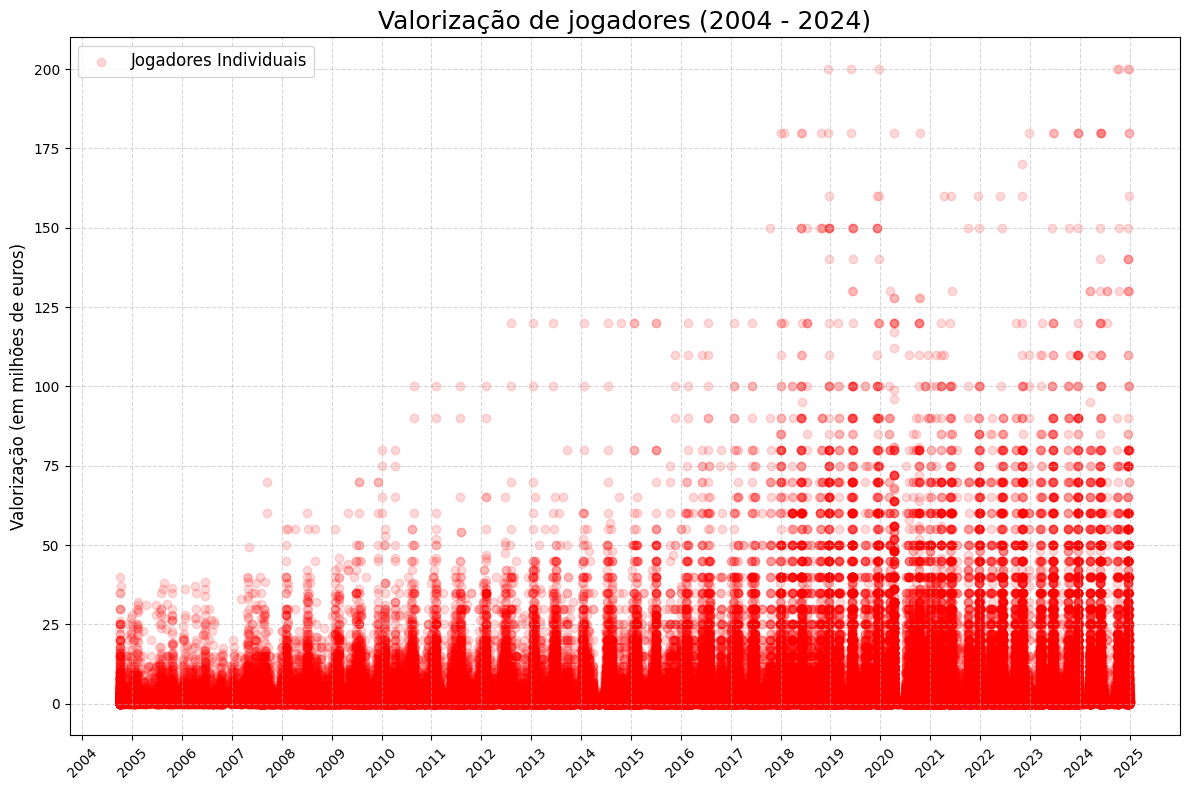

In [64]:
plt.figure(figsize = (12, 8))

# Scatter dos jogadores individuais
plt.scatter(
    player_valuations_data['date'],
    y = player_valuations_data['market_value_in_eur'] / 1000000,
    c = 'red', alpha = 0.15, label = 'Jogadores Individuais'
)

# Ajuste dos ticks para mostrar todos os anos de 2004-2024 (2025 aparece para limitar até dezembro de 2024)
anos = pd.date_range(start = '2004', end = '2025', freq = 'YS')
plt.xticks(anos, [ano.year for ano in anos], rotation = 45)

# Labels e título
plt.ylabel('Valorização (em milhões de euros)', fontsize = 12)
plt.title('Valorização de jogadores (2004 - 2024)', fontsize = 18)
plt.legend(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

#### 3.2 - Valorização média de jogadores (2004 - 2024)

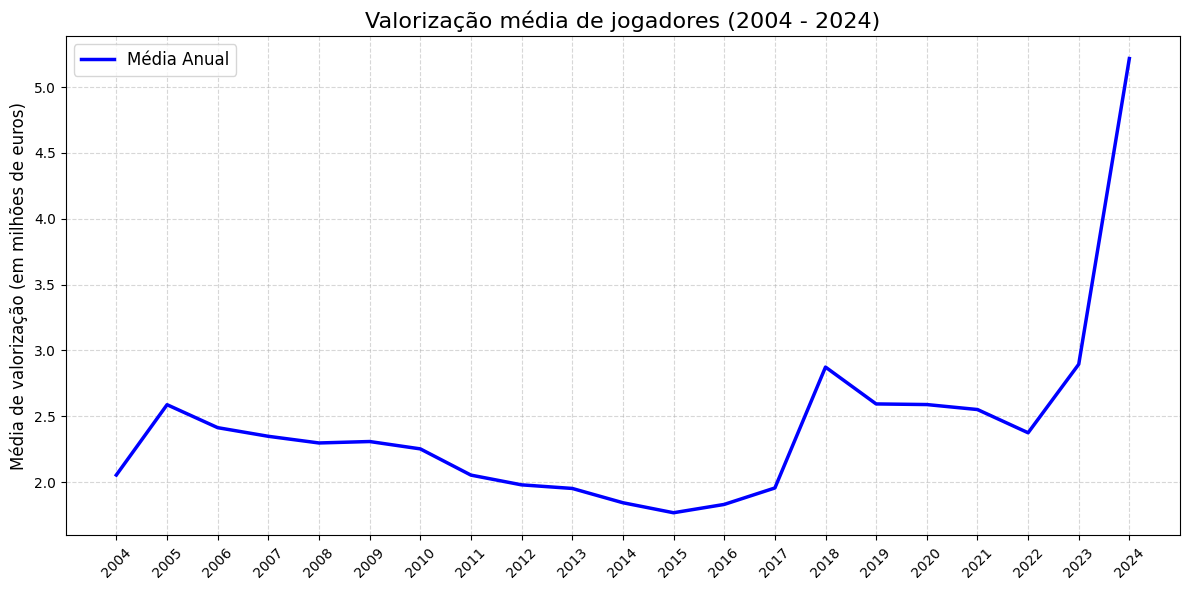

In [65]:
plt.figure(figsize = (12, 6))

# Linha da média anual
plt.plot(
    media_anual['date'],
    media_anual['market_value_in_eur'],
    color = 'blue', linewidth = 2.5, label = 'Média Anual'
)

# Ajuste dos ticks para mostrar todos os anos
anos = pd.date_range(start = '2004', end = '2024', freq = 'YS')
plt.xticks(anos, [ano.year for ano in anos], rotation = 45)

# Labels e título
plt.ylabel('Média de valorização (em milhões de euros)', fontsize = 12)
plt.title('Valorização média de jogadores (2004 - 2024)', fontsize = 16)
plt.legend(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

#### 3.3 - Soma das valorizações dos jogadores (2004 - 2024)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


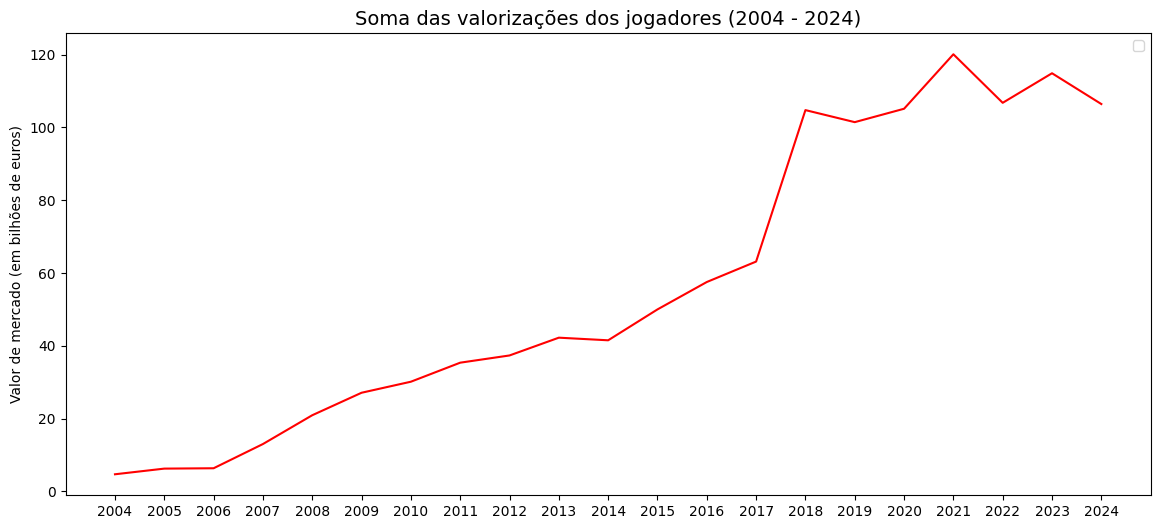

In [66]:
f = plt.figure(figsize = (14, 6))

yeargroups = player_valuations_data.loc[:, ['market_value_in_eur', 'year']].groupby(['year']).sum().sort_values(by = 'year', ascending = True)

anos = pd.date_range(start = '2004', end = '2024', freq = 'YS')
plt.plot(yeargroups.index, yeargroups / 1000000000, color = 'red')
plt.xticks(anos.year, fontsize = 10)
plt.title('Soma das valorizações dos jogadores (2004 - 2024)', fontsize = 14)
plt.ylabel('Valor de mercado (em bilhões de euros)')

plt.legend()
plt.show()

#### 3.4 - Valorização por posição (2004 - 2024)

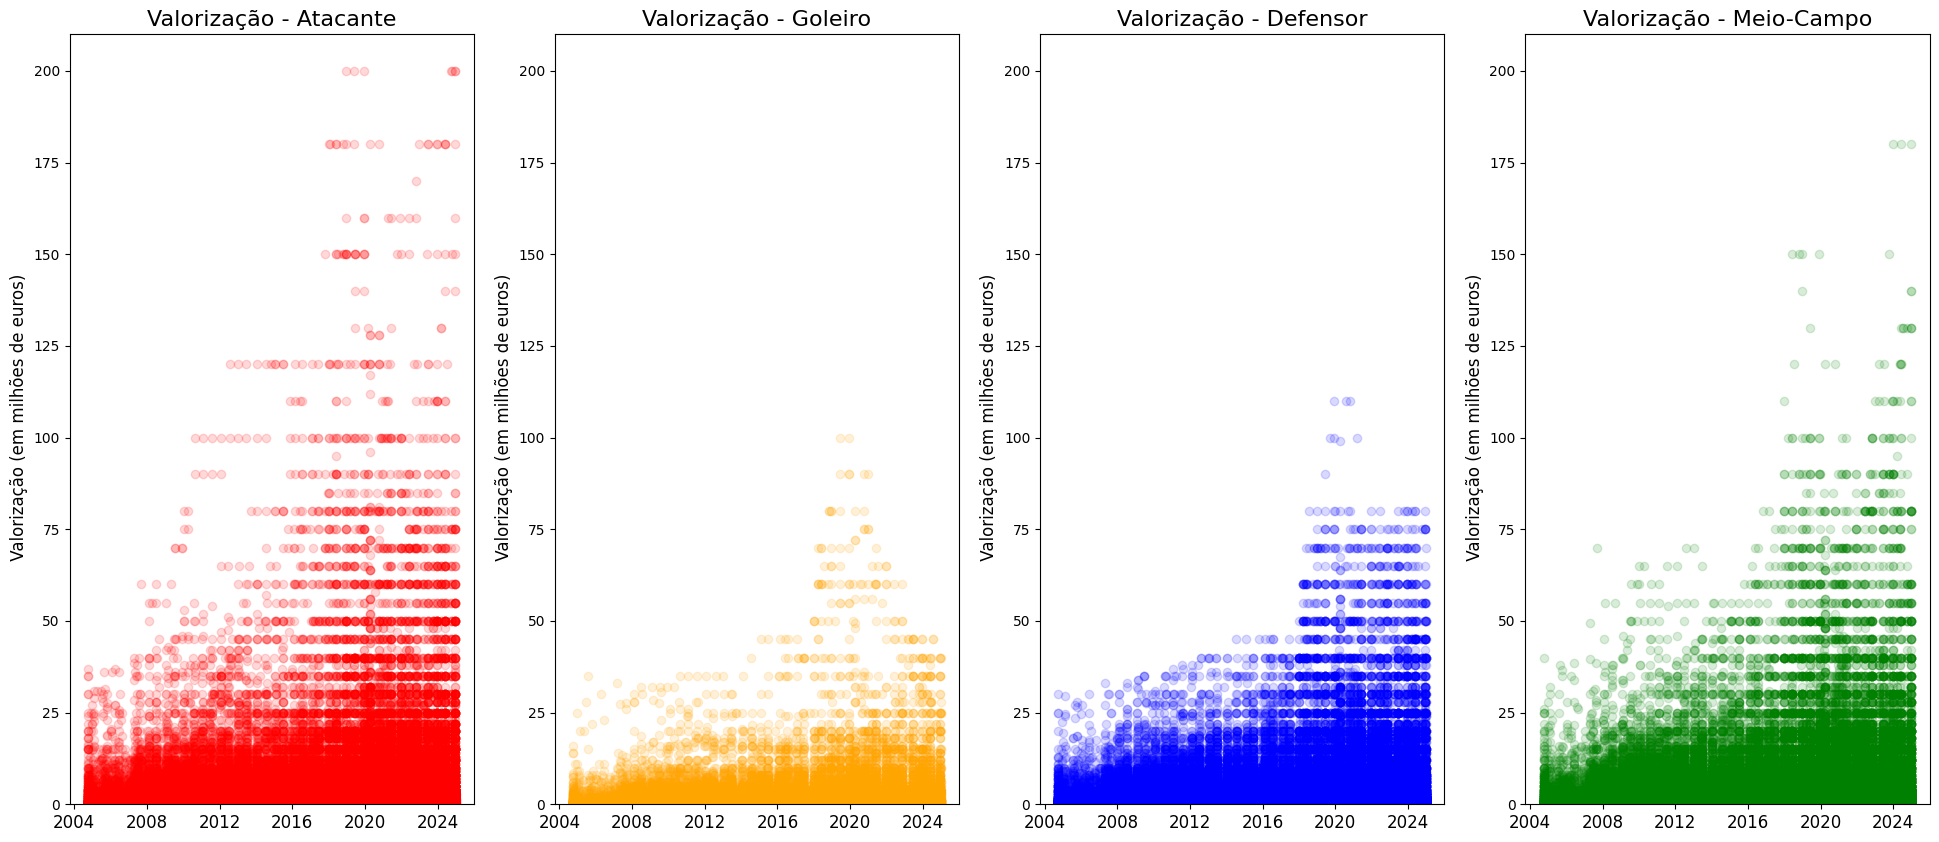

In [67]:
true_positions = [['Attack', 'Atacante'], ['Goalkeeper', 'Goleiro'], ['Defender', 'Defensor'], ['Midfield', 'Meio-Campo']]
positions = ['Atacante', 'Goleiro', 'Defensor', 'Meio-Campo']

plt.figure(figsize = (24, 10))

n = 1; colour = ['yellow', 'r', 'orange', 'b', 'g']

for true_position, position in true_positions:

    plt.subplot(1, 4, n); n = n + 1

    player_valuations_per_position = player_valuations_data[(player_valuations_data['position'] == true_position)]

    plt.scatter(player_valuations_per_position['date'], y = player_valuations_per_position['market_value_in_eur'] / 1000000, c = colour[n - 1], alpha = 0.15)
    plt.ylabel(' Valorização (em milhões de euros)', fontsize = 12)
    plt.title('Valorização - ' + position, fontsize = 16)
    plt.ylim(0, 210)
    plt.xticks(fontsize = 12)

plt.show()

#### 3.5 - Subposições de todos os jogadores V.S. jogadores valorizados (valor de mercado > 20M de euros)

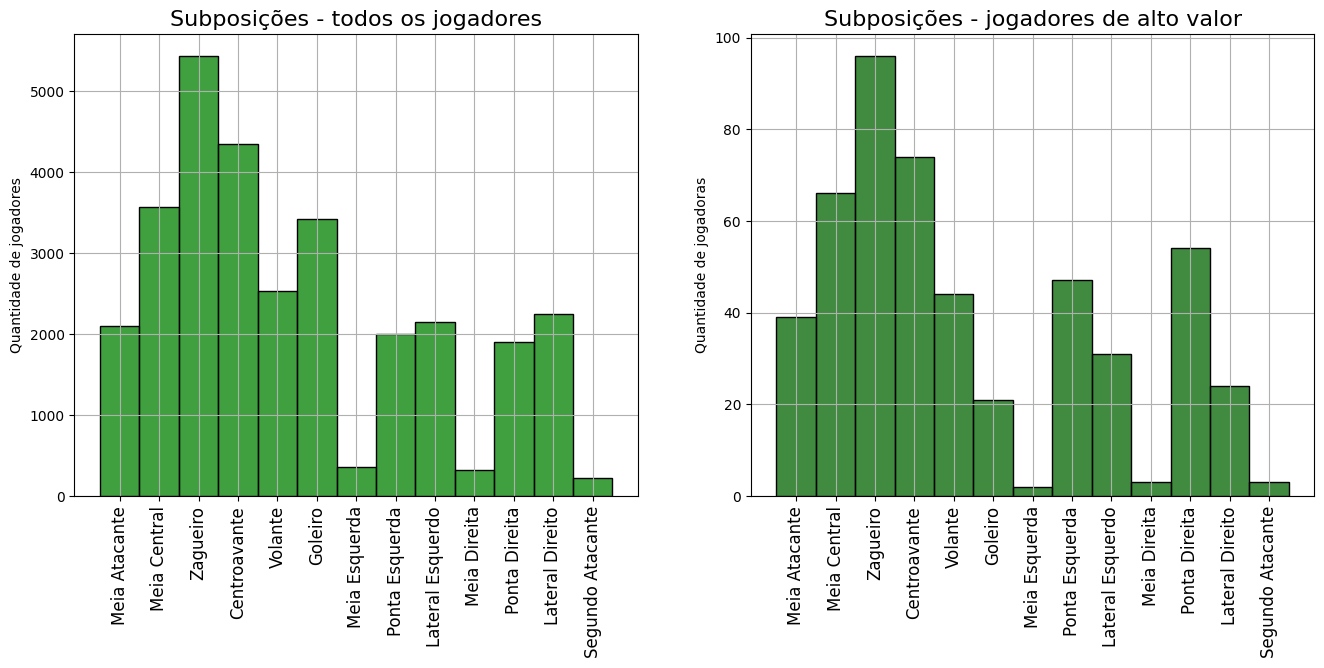

In [68]:
subposicoes = ['Meia Atacante', 'Meia Central', 'Zagueiro', 'Centroavante',
               'Volante', 'Goleiro', 'Meia Esquerda', 'Ponta Esquerda',
               'Lateral Esquerdo', 'Meia Direita', 'Ponta Direita', 
               'Lateral Direito', 'Segundo Atacante']

players_data1 = players_data.copy()

players_data1 = players_data1.sort_values("highest_market_value_in_eur", ascending = False)

players_data1 = players_data[players_data['last_season'] >= 2004]
high_value_players_data = players_data1[(players_data1.market_value_in_eur > 20000000)]
positions=players_data.position.unique()

players_data1 = players_data1.sort_values("sub_position", ascending = True)
high_value_players_data1 = high_value_players_data.sort_values("sub_position", ascending = True)

f = plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.histplot(x = 'sub_position', data = players_data1, color = 'g')
plt.title("Subposições - todos os jogadores", fontsize = 16)
plt.grid(True)
plt.xlabel("")
plt.ylabel('Quantidade de jogadores')
plt.xticks(ticks = range(len(subposicoes)), labels = subposicoes, rotation = 90, fontsize = 12);

plt.subplot(1, 2, 2)
sns.histplot(x = 'sub_position', data = high_value_players_data1, color = 'darkgreen')
plt.title("Subposições - jogadores de alto valor", fontsize = 16)
plt.grid(True)
plt.xlabel("")
plt.ylabel('Quantidade de jogadoras')
plt.xticks(ticks = range(len(subposicoes)), labels = subposicoes, rotation = 90, fontsize = 12);

### 4 - Agrupando dados de jogadores em 2024

#### 4.1 - Appearances dataset:

In [69]:
appearances_data.head(3)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,223197838004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,223374879232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,223441342792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45


In [70]:
# Filtrando apenas o ano de 2024
appearances_2024 = appearances_data[appearances_data['date'].dt.year == 2024]

##### Feature Engineering - Gols, Assistências e Média de minutos em 2024 por jogador

In [71]:
# Agrupando por jogador os valores: Gols, Assistências e a média de minutos jogados em 2024
agg_2024 = appearances_2024.groupby('player_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'mean'
}).reset_index()

In [72]:
# Renomeando as colunas com o sufixo 2024:
agg_2024.rename(columns = {
    'goals': 'goals_2024',
    'assists': 'assists_2024',
    'minutes_played': 'avg_minutes_2024'
}, inplace = True)

In [73]:
agg_2024

,player_id,goals_2024,assists_2024,avg_minutes_2024
0,3333,0,0,59.000000
1,4391,0,0,5.000000
2,5336,0,0,58.058824
3,7161,3,5,54.967742
4,7825,0,0,92.000000
...,...,...,...,...
7820,1302421,0,0,39.400000
7821,1306851,1,2,23.666667
7822,1309326,0,0,5.666667
7823,1310513,0,0,5.000000


#### 4.2 - Game_lineups dataset:

In [74]:
game_lineups_data.head(3)

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,False
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,False
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,False


In [75]:
# Filtrando apenas o ano de 2024
lineups_2024 = game_lineups_data[game_lineups_data['date'].dt.year == 2024]

##### Feature Engineering - Proporção de titularidade: número de jogos como titular / total de jogos

In [76]:
# Calculando a proporção de titularidade (proporcao_titular = numero de jogos como titular / total de jogos)
titularidade = lineups_2024.groupby(['player_id', 'type']).size().unstack(fill_value = 0)

In [77]:
# Garantindo que as colunas existam (caso não haja algum tipo em 2024)
titularidade = titularidade.rename(columns = lambda x: x.lower().strip())
if 'starting_lineup' not in titularidade.columns:
    titularidade['starting_lineup'] = 0
if 'substitutes' not in titularidade.columns:
    titularidade['substitutes'] = 0

In [78]:
titularidade['total'] = titularidade['starting_lineup'] + titularidade['substitutes']
titularidade['proporcao_titular'] = titularidade['starting_lineup'] / titularidade['total']
titularidade = titularidade[['proporcao_titular']].reset_index()

##### Feature Engineering - Número de vezes como capitão (2024)

In [79]:
# Calculando número de vezes como capitão:
capitaes = lineups_2024.groupby('player_id')['team_captain'].sum().reset_index()
capitaes = capitaes.rename(columns={'team_captain': 'vezes_capitao_2024'})

In [80]:
# Juntando os dois resultados:
lineups_agg_2024 = titularidade.merge(capitaes, on = 'player_id', how = 'left')

In [81]:
lineups_agg_2024

,player_id,proporcao_titular,vezes_capitao_2024
0,3333,0.666667,0
1,4391,0.000000,0
2,5336,0.428571,3
3,7161,0.545455,0
4,7825,0.285714,0
...,...,...,...
7719,1240984,0.000000,0
7720,1244432,0.000000,0
7721,1244433,0.000000,0
7722,1244434,1.000000,0


#### 4.3 - Games dataset:

In [82]:
games_data.head(3)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_manager_name,away_club_manager_name,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,2013-08-11,33,41,3,3,Jens Keller,Thorsten Fink,Manuel Gräfe,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,2013-08-10,23,86,0,1,Torsten Lieberknecht,Robin Dutt,Deniz Aytekin,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2013-08-18,16,23,2,1,Jürgen Klopp,Torsten Lieberknecht,Peter Sippel,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league


##### Feature Engineering - Esquema em que o jogador mais jogou em sua carreira:

In [83]:
games_filtered = games_data[
    (games_data['season'] >= 2004) & (games_data['season'] <= 2024)
]

In [84]:
# Concatenar formações como mandante e visitante
home_formations = games_filtered[['home_club_id', 'home_club_formation']].rename(
    columns = {'home_club_id': 'club_id', 'home_club_formation': 'formation'}
)
away_formations = games_filtered[['away_club_id', 'away_club_formation']].rename(
    columns = {'away_club_id': 'club_id', 'away_club_formation': 'formation'}
)

formations_all = pd.concat([home_formations, away_formations], axis = 0)

# Formação mais usada por clube
club_formation_mode = formations_all.groupby('club_id')['formation'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
).reset_index().rename(columns = {'formation': 'most_used_formation'})

In [85]:
# Remover linhas com 'retired' (ou manter se quiser)
transfers_clean = transfers_data[transfers_data['to_club_id'] != 'retired']

# Garantir tipos compatíveis
transfers_clean['to_club_id'] = transfers_clean['to_club_id'].astype(int)
club_formation_mode['club_id'] = club_formation_mode['club_id'].astype(int)

# Merge das transferências com as formações
transfers_with_formation = transfers_clean.merge(
    club_formation_mode,
    left_on = 'to_club_id',
    right_on = 'club_id',
    how = 'left'
)

In [86]:
# Agrupar por jogador e calcular a moda das formações
player_formation_mode = transfers_with_formation.groupby('player_id')['most_used_formation'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
).reset_index().rename(columns={'most_used_formation': 'player_preferred_formation'})

In [87]:
df_visualize_atributes(player_formation_mode)

O dataframe possui 10448 amostras e 2 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10448 entries, 0 to 10447
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   player_id                   10448 non-null  int64 
 1   player_preferred_formation  9516 non-null   object
dtypes: int64(1), object(1)
memory usage: 163.4+ KB
None


In [88]:
player_formation_mode['player_preferred_formation'].unique()

array(['4-2-3-1', '4-3-3 Defending', '4-3-3 Attacking', '4-3-1-2',
       '3-5-2 flat', '4-1-4-1', '4-4-2 double 6', '3-4-1-2', '3-4-2-1',
       '3-4-3', '5-4-1', '4-4-2', '3-5-2', '5-3-2', '4-4-2 Diamond',
       '3-5-2 Attacking', '4-3-2-1', nan, '4-4-1-1'], dtype=object)

In [89]:
player_formation_mode = player_formation_mode.fillna("Other")

In [90]:
player_formation_mode['player_preferred_formation'].unique()

array(['4-2-3-1', '4-3-3 Defending', '4-3-3 Attacking', '4-3-1-2',
       '3-5-2 flat', '4-1-4-1', '4-4-2 double 6', '3-4-1-2', '3-4-2-1',
       '3-4-3', '5-4-1', '4-4-2', '3-5-2', '5-3-2', '4-4-2 Diamond',
       '3-5-2 Attacking', '4-3-2-1', 'Other', '4-4-1-1'], dtype=object)

In [91]:
player_formation_mode.isnull().sum()

player_id                     0
player_preferred_formation    0
dtype: int64

#### 4.4 - Player_valuations dataset:

In [92]:
player_valuations_data.head(3)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,year,position
1,405973,2016-02-07,250000,3057,BE1,2016,Attack
2,405973,2016-07-15,250000,3057,BE1,2016,Attack
3,405973,2017-01-01,150000,3057,BE1,2017,Attack


In [93]:
player_valuations_data['year'] = player_valuations_data['year'].astype(int)

In [94]:
# Filtrando apenas anos de 2019 a 2024
mv_5y = player_valuations_data[player_valuations_data['year'].between(2019, 2024)]

In [95]:
# Ordenando e mantendo o último valor do ano por jogador (caso haja múltiplas entradas por ano)
mv_5y = mv_5y.sort_values(['player_id', 'year', 'date'])
mv_5y = mv_5y.drop_duplicates(subset = ['player_id', 'year'], keep = 'last')

In [96]:
# Pivotando a tabela para transformar os anos em colunas
mv_pivot = mv_5y.pivot(index = 'player_id', columns = 'year', values = 'market_value_in_eur')

In [97]:
# Renomeando as colunas
mv_pivot.columns = [f'market_value_{col}' for col in mv_pivot.columns]
mv_pivot = mv_pivot.reset_index()
mv_pivot = mv_pivot.fillna(0)


In [98]:
mv_pivot

,player_id,market_value_2019,market_value_2020,market_value_2021,market_value_2022,market_value_2023,market_value_2024
0,215,0.0,250000.0,250000.0,250000.0,250000.0,0.0
1,532,500000.0,400000.0,0.0,0.0,0.0,0.0
2,597,150000.0,0.0,0.0,0.0,0.0,0.0
3,1094,200000.0,0.0,0.0,0.0,0.0,0.0
4,1126,250000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
26128,1294049,0.0,0.0,0.0,0.0,0.0,200000.0
26129,1294052,0.0,0.0,0.0,0.0,0.0,150000.0
26130,1302421,0.0,0.0,0.0,0.0,0.0,100000.0
26131,1306131,0.0,0.0,0.0,0.0,0.0,100000.0


In [99]:
pivot_2024 = mv_pivot[mv_pivot['market_value_2024'] != 0].reset_index(drop = True)
pivot_2024.drop(columns = ['market_value_2024'], inplace = True)

In [100]:
pivot_2024

,player_id,market_value_2019,market_value_2020,market_value_2021,market_value_2022,market_value_2023
0,3333,12000000.0,5000000.0,2000000.0,2000000.0,1000000.0
1,4391,300000.0,200000.0,150000.0,100000.0,75000.0
2,5336,400000.0,350000.0,350000.0,450000.0,450000.0
3,7161,9000000.0,14000000.0,16000000.0,13000000.0,13000000.0
4,7825,800000.0,800000.0,800000.0,700000.0,700000.0
...,...,...,...,...,...,...
9590,1294049,0.0,0.0,0.0,0.0,0.0
9591,1294052,0.0,0.0,0.0,0.0,0.0
9592,1302421,0.0,0.0,0.0,0.0,0.0
9593,1306131,0.0,0.0,0.0,0.0,0.0


#### 4.4 - Agrupando todos os dados de jogadores em um único Dataframe:

In [101]:
players_data.head(3)

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09,Centre-Forward,Attack,right,184.000000,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.000000,L1,Borussia Dortmund,750000.0,8000000.0,45
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,both,183.404193,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44


Filtrando os jogadores que atuaram em 2024:

In [102]:
players_data_2024 = players_data[players_data['last_season'] == 2024].reset_index(drop = True)

In [103]:
players_data_2024

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,3333,James Milner,2024,1237,james-milner,England,1986-01-04,Central Midfield,Midfield,right,175.0,GB1,Brighton and Hove Albion Football Club,1000000.0,21000000.0,39
1,5336,Anastasios Tsokanis,2024,60949,anastasios-tsokanis,Greece,1991-05-02,Defensive Midfield,Midfield,left,176.0,GR1,Volou Neos Podosferikos Syllogos,300000.0,450000.0,34
2,7161,Jonas Hofmann,2024,15,jonas-hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176.0,L1,Bayer 04 Leverkusen Fußball,3000000.0,16000000.0,33
3,7825,Pepe Reina,2024,1047,pepe-reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188.0,IT1,Calcio Como,600000.0,22000000.0,43
4,11530,Lionel Carole,2024,3205,lionel-carole,France,1991-04-12,Left-Back,Defender,left,180.0,TR1,Kayserispor Kulübü,400000.0,3500000.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,1294052,João Barros,2024,2503,joao-barros,Portugal,2006-01-10,Left Winger,Attack,right,184.0,PO1,Boavista Futebol Clube,150000.0,150000.0,19
6291,1302421,João Neto,2024,6992,joao-neto,Brazil,2003-02-04,Right Winger,Attack,right,178.0,UKR1,ZAO FK Chornomorets Odessa,100000.0,100000.0,22
6292,1306131,Fábio Sambú,2024,2503,fabio-sambu,Portugal,2007-09-06,Centre-Forward,Attack,right,180.0,PO1,Boavista Futebol Clube,100000.0,100000.0,18
6293,1306851,Hakim Sulemana,2024,5724,hakim-sulemana,Ghana,2005-02-19,Left Winger,Attack,both,164.0,DK1,Randers Fodbold Club,50000.0,50000.0,20


Realizando o merge dos atributos com o novo dataframe principal (all_players_data):

In [104]:
all_players_data = players_data_2024.merge(agg_2024, on = 'player_id', how = 'left')

In [105]:
all_players_data = all_players_data.merge(lineups_agg_2024, on = 'player_id', how = 'left')

In [106]:
all_players_data = all_players_data.merge(player_formation_mode, on = 'player_id', how = 'left')

In [107]:
all_players_data = all_players_data.merge(pivot_2024, on = 'player_id', how = 'left')

Verificando dados nulos no novo dataframe principal:

In [108]:
all_players_data.isnull().sum()

player_id                                  0
name                                       0
last_season                                0
current_club_id                            0
player_code                                0
country_of_citizenship                     0
date_of_birth                              0
sub_position                               0
position                                   0
foot                                       0
height_in_cm                               0
current_club_domestic_competition_id       0
current_club_name                          0
market_value_in_eur                        0
highest_market_value_in_eur                0
age                                        0
goals_2024                               652
assists_2024                             652
avg_minutes_2024                         652
proporcao_titular                       2025
vezes_capitao_2024                      2025
player_preferred_formation                 0
market_val

Preenchendo os dados nulos com valor 0:

In [109]:
all_players_data.fillna({
    'goals_2024': 0,
    'assists_2024': 0,
    'avg_minutes_2024': 0,
    'proporcao_titular': 0,
    'vezes_capitao_2024': 0,
    'market_value_2019': 0,
    'market_value_2020': 0,
    'market_value_2021': 0,
    'market_value_2022': 0,
    'market_value_2023': 0
}, inplace = True)

In [110]:
df_visualize_atributes(all_players_data)

O dataframe possui 6295 amostras e 27 atributos/colunas.

Mais informações:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 6294
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             6295 non-null   int64         
 1   name                                  6295 non-null   object        
 2   last_season                           6295 non-null   int64         
 3   current_club_id                       6295 non-null   int64         
 4   player_code                           6295 non-null   object        
 5   country_of_citizenship                6295 non-null   object        
 6   date_of_birth                         6295 non-null   datetime64[ns]
 7   sub_position                          6295 non-null   object        
 8   position                              6295 non-null   object        
 9

Gerando a Matriz de Correlação de Pearson, com o intuito de verificar a correlação dos atributos entre si:

Index(['market_value_in_eur', 'highest_market_value_in_eur', 'age',
       'goals_2024', 'assists_2024', 'avg_minutes_2024', 'proporcao_titular',
       'vezes_capitao_2024', 'market_value_2019', 'market_value_2020',
       'market_value_2021', 'market_value_2022', 'market_value_2023'],
      dtype='object')


<Axes: title={'center': 'Correlação de Pearson'}>

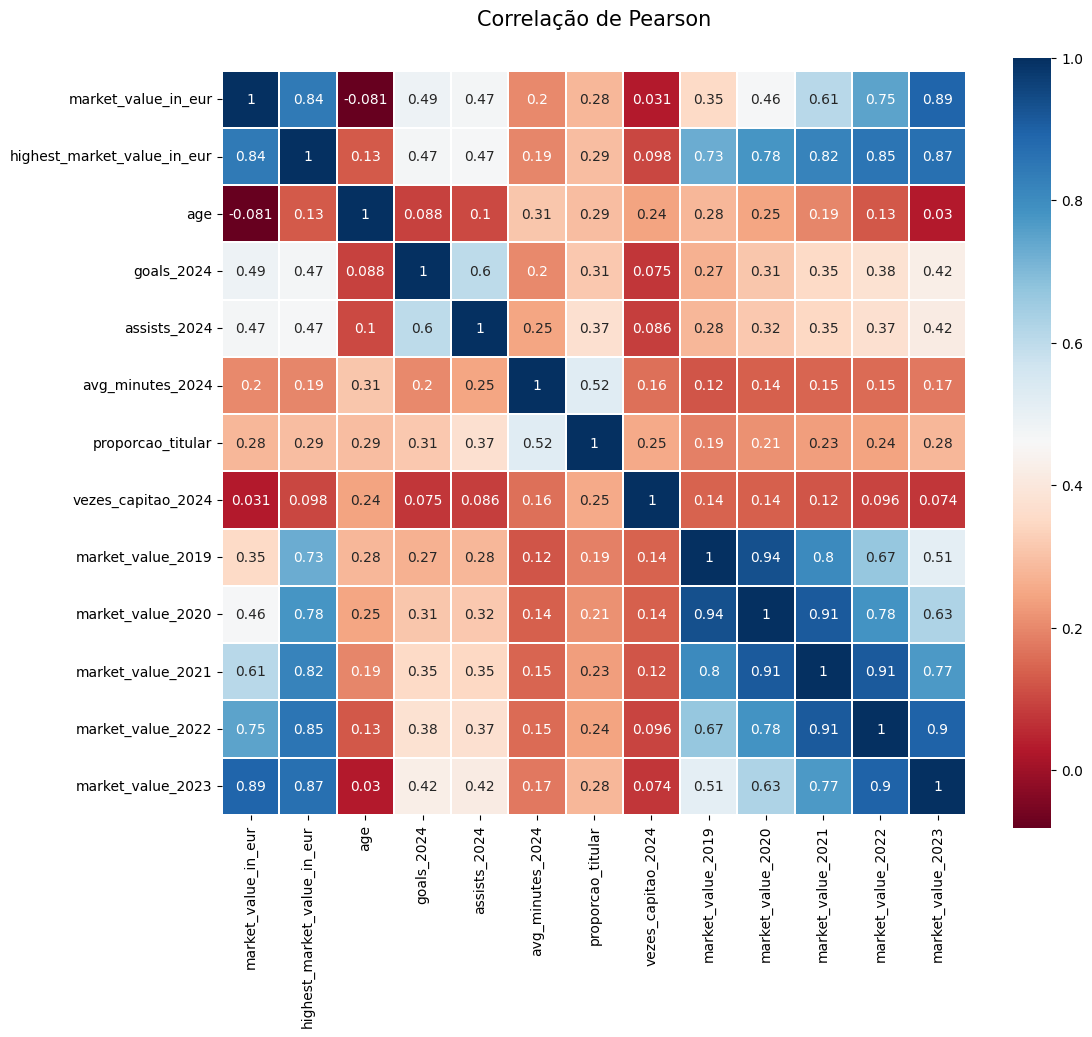

In [111]:
colormap = plt.cm.RdBu
plt.figure(figsize = (12, 10))
plt.title('Correlação de Pearson', y = 1.05, size = 15)
features_df = all_players_data.drop(['player_id', 'player_code', 'name', 'position','sub_position', 'current_club_id',
                                     'date_of_birth', 'last_season','foot','height_in_cm','country_of_citizenship', 
                                     'current_club_name','current_club_domestic_competition_id', 'player_preferred_formation'], axis = 1)
print(features_df.columns)
sns.heatmap(features_df.astype(float).corr(),linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

### 5 - Exportação do Dataframe final

In [130]:
all_players_data.to_csv('all_players_data.csv', index = False)

### Teste modelo:

In [112]:
def print_cv_results(name, results):
    print(f"\nResultados - {name}")
    print(f"R² (média): {np.mean(results['test_r2']):.4f}")
    print(f"RMSE (média): {-np.mean(results['test_neg_root_mean_squared_error']):.2f}")
    print(f"MAE (média): {-np.mean(results['test_neg_mean_absolute_error']):.2f}")

In [113]:
target = 'market_value_in_eur'

columns_to_exclude = [
    'player_id', 'name', 'player_code', 'date_of_birth', 'current_club_name',
    'market_value_in_eur'
]

X = all_players_data.drop(columns = columns_to_exclude)
y = all_players_data[target]

categorical_cols = X.select_dtypes(include = ['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Preprocessor:

In [114]:
preprocessor = ColumnTransformer(
    transformers = [('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)],
    remainder = 'passthrough'
)

Random Forest Regressor:

In [115]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state = 42))
])

In [116]:
rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

In [117]:
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv = 5, scoring = 'r2', n_jobs = -1)
rf_grid.fit(X, y)
print("Melhores parâmetros RF:", rf_grid.best_params_)

Melhores parâmetros RF: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}


XGBoost:

In [118]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state = 42, verbosity = 0))
])

In [119]:
xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1]
}

In [120]:
xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv = 5, scoring = 'r2', n_jobs = -1)
xgb_grid.fit(X, y)
print("Melhores parâmetros XGBoost:", xgb_grid.best_params_)

Melhores parâmetros XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}


In [121]:
scoring = {
    'r2': 'r2',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error'
}

In [122]:
rf_results = cross_validate(rf_grid.best_estimator_, X, y, cv = 5, scoring = scoring, return_train_score = True)
xgb_results = cross_validate(xgb_grid.best_estimator_, X, y, cv = 5, scoring = scoring, return_train_score = True)

In [123]:
print_cv_results("Random Forest", rf_results)
print_cv_results("XGBoost", xgb_results)


Resultados - Random Forest
R² (média): 0.7235
RMSE (média): 4273144.39
MAE (média): 1586375.60

Resultados - XGBoost
R² (média): 0.8346
RMSE (média): 3795033.18
MAE (média): 1687263.83


In [124]:
results_df = pd.DataFrame({
    'Modelo': ['Random Forest'] * 5 + ['XGBoost'] * 5,
    'R²': np.concatenate([rf_results['test_r2'], xgb_results['test_r2']]),
    'RMSE': -np.concatenate([rf_results['test_neg_root_mean_squared_error'], xgb_results['test_neg_root_mean_squared_error']]),
    'MAE': -np.concatenate([rf_results['test_neg_mean_absolute_error'], xgb_results['test_neg_mean_absolute_error']])
})

In [125]:
results_long = results_df.melt(id_vars = 'Modelo', var_name = 'Métrica', value_name = 'Valor')

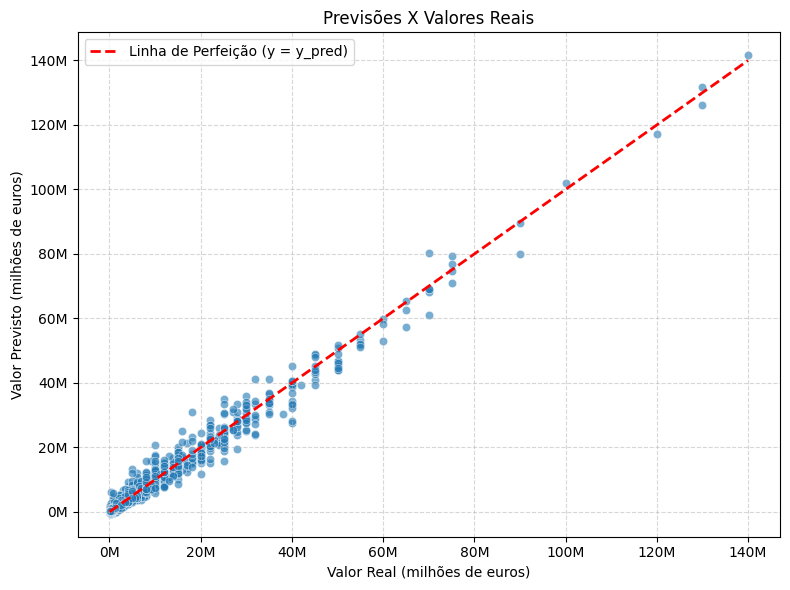

In [126]:
# Previsões com o modelo XGBoost já treinado
y_pred = xgb_grid.predict(X_test)

# Converter valores para milhões
y_test_mil = y_test / 1e6
y_pred_mil = y_pred / 1e6

# Função para formatar os valores dos eixos como milhões
def milhões(x, pos):
    return f'{x:.0f}M'

formatter = FuncFormatter(milhões)

# Gráfico de dispersão
plt.figure(figsize = (8, 6))
sns.scatterplot(x = y_test_mil, y = y_pred_mil, alpha = 0.6)

plt.plot([y_test_mil.min(), y_test_mil.max()],
         [y_test_mil.min(), y_test_mil.max()],
         color = 'red', lw = 2, linestyle = '--', label = 'Linha de Perfeição (y = y_pred)')

plt.title('Previsões X Valores Reais')
plt.xlabel('Valor Real (milhões de euros)')
plt.ylabel('Valor Previsto (milhões de euros)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

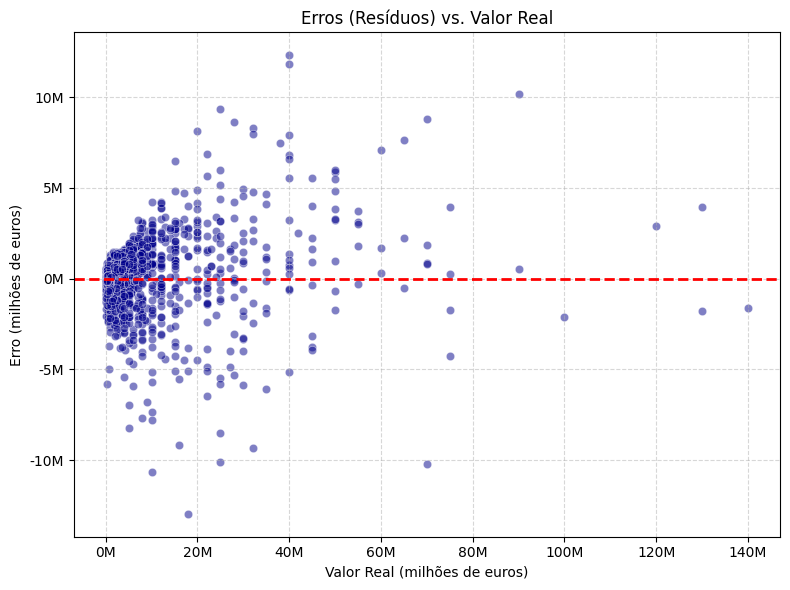

In [127]:
# Cálculo dos resíduos
residuals = y_test - y_pred

# Converter para milhões de euros
y_test_mil = y_test / 1e6
residuals_mil = residuals / 1e6

# Formatador de milhões
def milhões(x, pos):
    return f'{x:.0f}M'

formatter = FuncFormatter(milhões)

# Gráfico de resíduos
plt.figure(figsize = (8, 6))
sns.scatterplot(x = y_test_mil, y = residuals_mil, alpha = 0.5, color = 'darkblue')

plt.axhline(0, color = 'red', linestyle = '--', lw = 2)
plt.title('Erros (Resíduos) vs. Valor Real')
plt.xlabel('Valor Real (milhões de euros)')
plt.ylabel('Erro (milhões de euros)')
plt.grid(True, linestyle = '--', alpha = 0.5)

# Aplicar formatador nos eixos
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

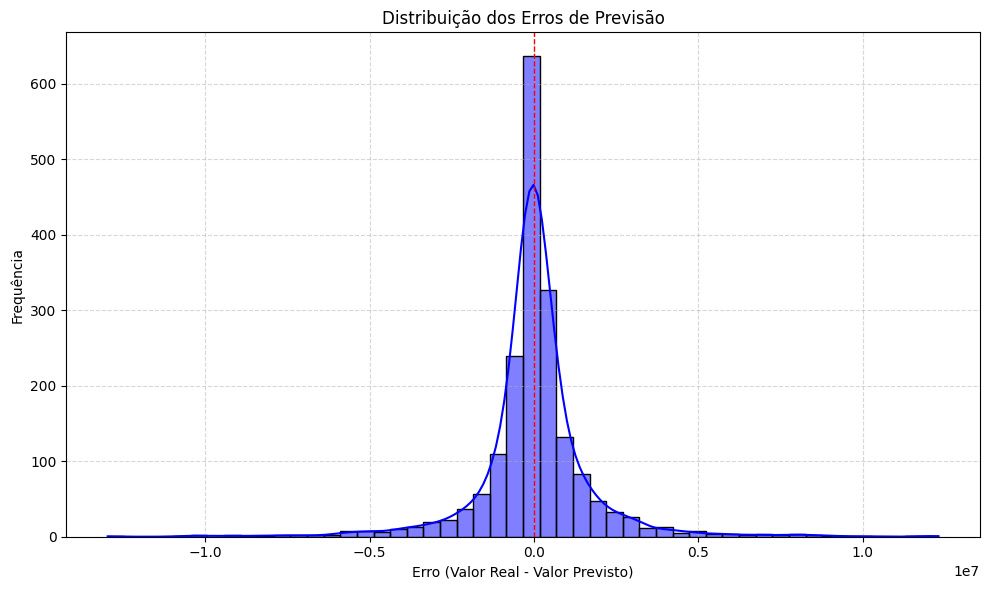

In [128]:
plt.figure(figsize = (10, 6))
sns.histplot(residuals, bins = 50, kde = True, color = 'blue')

plt.axvline(0, color = 'r', linestyle = '--', lw = 1)
plt.title('Distribuição dos Erros de Previsão')
plt.xlabel('Erro (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()